### **Function for Monte Carlo Simulation**

  #### **Libraries**

In [62]:
import numpy as np
import matplotlib.pyplot as plt

#### **Monte Carlo Option Pricing Function**

In [63]:
def monte_carlo_option_pricing(S0, K, r, sigma, T, N):
    """
    Simulates stock prices using Geometric Brownian Motion and computes 
    expected stock price, std deviation, and European call & put option prices.
    Plots histogram of simulated stock prices.
    
    Parameters:
        S0: Initial stock price
        K: Strike price
        r: Risk-free interest rate
        sigma: Volatility
        T: Time to maturity
        N: Number of simulations
    
    Returns:
        expected_price, std_price, call_price, put_price
    """
    # Generate N random numbers from standard normal distribution
    Z = np.random.standard_normal(N)
    
    # Simulate stock prices at time T using Geometric Brownian Motion
    ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
    
    # Calculate statistics
    expected_price = np.mean(ST)
    std_price = np.std(ST)
    
    # Calculate option prices
    call_price = np.exp(-r * T) * np.mean(np.maximum(ST - K, 0))
    put_price = np.exp(-r * T) * np.mean(np.maximum(K - ST, 0))
    
    
    
    return (expected_price, std_price, call_price, put_price)


#### **Base Case Analysis**

In [64]:
# Parameters
S0 = 100
K = 105
r = 0.05
sigma = 0.20
T = 1
N = 10000

# Run Monte Carlo Simulation
expected_price, std_price, call_price, put_price = monte_carlo_option_pricing(S0, K, r, sigma, T, N)


##### **Plot Histogram**

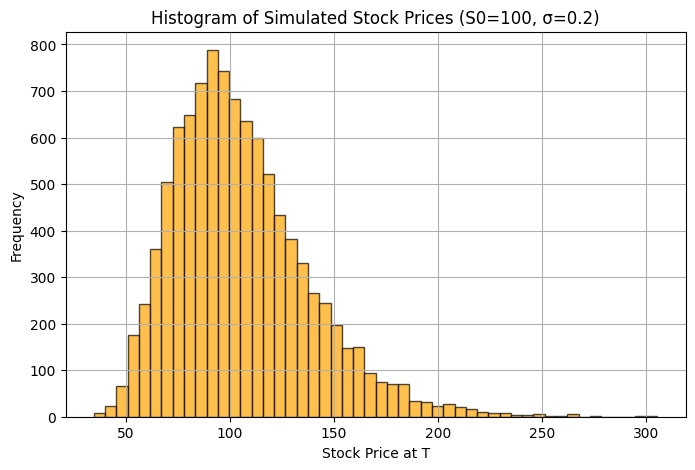

In [65]:
# Plot histogram of simulated stock prices
plt.figure(figsize=(8,5))
plt.hist(ST, bins=50, alpha=0.7, color='orange', edgecolor='black')
plt.title(f"Histogram of Simulated Stock Prices (S0={S0}, σ={sigma})")
plt.xlabel("Stock Price at T")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [66]:
# Display Results
print(f"Expected Stock Price: {expected_price:.4f}")
print(f"Standard Deviation: {std_price:.4f}")
print(f"Call Option Price: {call_price:.4f}")
print(f"Put Option Price: {put_price:.4f}")

Expected Stock Price: 105.0385
Standard Deviation: 21.0221
Call Option Price: 7.8996
Put Option Price: 7.8630


####  **Volatility Impact Study**

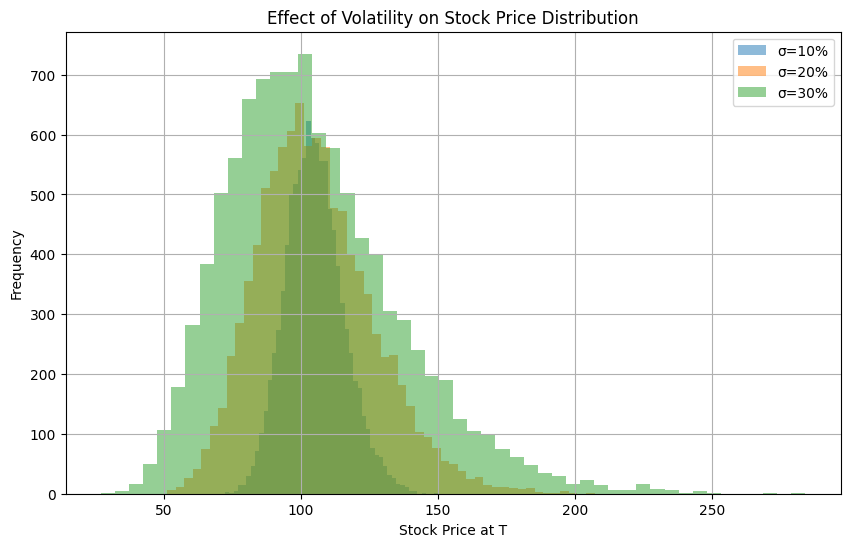

In [67]:
vols = [0.10, 0.20, 0.30]  # 10%, 20%, 30% volatility
plt.figure(figsize=(10,6))

for sigma in vols:
    # Simulate stock prices
    ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * np.random.standard_normal(N))
    
    # Plot histogram
    plt.hist(ST, bins=50, alpha=0.5, label=f'σ={sigma*100:.0f}%')

plt.title("Effect of Volatility on Stock Price Distribution")
plt.xlabel("Stock Price at T")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


In [69]:
# Parameters
S0 = 100
K = 105
r = 0.05
sigma_list = [0.1,0.20,0.3]
T = 1
N = 10000

# Run Monte Carlo Simulation
for s in sigma_list:
    expected_price, std_price, call_price, put_price = monte_carlo_option_pricing(S0, K, r, s, T, N)
    # Display Results
    print(f"Expected Stock Price: {expected_price:.4f}")
    print(f"Standard Deviation: {std_price:.4f}")
    print(f"Call Option Price: {call_price:.4f}")
    print(f"Put Option Price: {put_price:.4f}")
        


Expected Stock Price: 105.0036
Standard Deviation: 10.5757
Call Option Price: 3.9926
Put Option Price: 3.9892
Expected Stock Price: 105.0766
Standard Deviation: 20.9286
Call Option Price: 7.8912
Put Option Price: 7.8184
Expected Stock Price: 105.4187
Standard Deviation: 32.4544
Call Option Price: 12.1990
Put Option Price: 11.8007


#### **Random Variable Z Analysis**

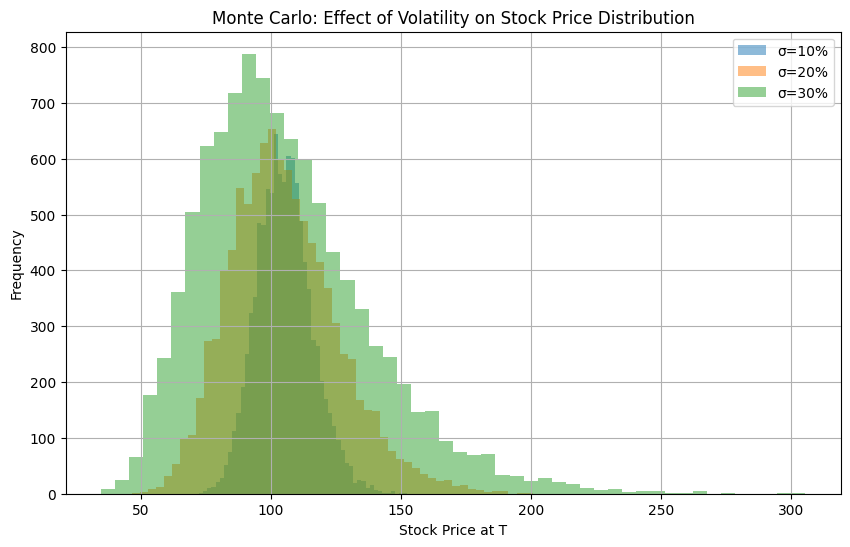

In [ ]:
vols = [0.10, 0.20, 0.30]
plt.figure(figsize=(10,6))

for sigma in vols:
    ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * np.random.standard_normal(N))
    plt.hist(ST, bins=50, alpha=0.5, label=f'σ={sigma*100:.0f}%')

plt.title("Monte Carlo: Effect of Volatility on Stock Price Distribution")
plt.xlabel("Stock Price at T")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()
